In [1]:
import numpy as np
import librosa
import ddsp.training

def filter_outliers(arr, threshold):
    mean = np.mean(arr)
    std = np.std(arr)
    filtered_arr = np.where(abs(arr - mean) <= threshold * std, arr, np.nan)
    return filtered_arr


def get_pitches(audio_np):
    audio_features = ddsp.training.metrics.compute_audio_features(audio_np)
    f0 = librosa.hz_to_midi(audio_features['f0_hz'])

    return f0

c:\Users\aresr\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\Users\aresr\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\Users\aresr\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ip

c:\Users\aresr\.pyenv\pyenv-win\versions\3.8.10\lib\site-packages\librosa\core\time_frequency.py:1204: RuntimeWarning: divide by zero encountered in log10
  weights = 2.0 + 20.0 * (np.log10(const[0]) + 4 * np.log10(frequencies)


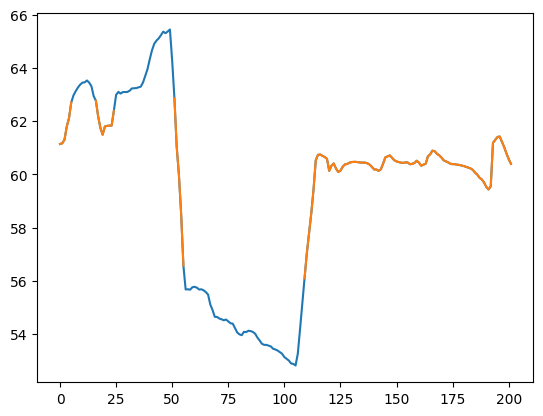

In [2]:
y, sr = librosa.load('cough2-06.wav')
f0 = get_pitches(y)

# plot f0
import matplotlib.pyplot as plt
plt.plot(f0)

# filter out outliers
filtered_f0 = filter_outliers(f0, 0.5)

# plot filtered f0
plt.plot(filtered_f0)